In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
yolo = cv2.dnn.readNet("yolov3.weights","yolov3.cfg")

In [13]:
with open("coco.names", "r") as file:
    classes = [line.strip() for line in file.readlines()]
    
layer_names = yolo.getLayerNames()
unconnected_out_layers = yolo.getUnconnectedOutLayers()

# Ensure the output is always iterable
if len(unconnected_out_layers.shape) == 1:  
    # If it's a 1D array: [82, 94, 106], use direct indexing
    output_layers = [layer_names[i - 1] for i in unconnected_out_layers]
else:  
    # If it's a 2D array: [[82], [94], [106]], use i[0]
    output_layers = [layer_names[i[0] - 1] for i in unconnected_out_layers]


colorRed = (0,0,255)
colorGreen = (0,255,0)

#Loading Images
name = "image.jpg"
img = cv2.imread(name)
height, width, channels = img.shape


#changing image to blob format to be used in YOLO
blob = cv2.dnn.blobFromImage(img,0.00932, (416,416), (0,0,0),True, crop=False)

yolo.setInput(blob)
outputs = yolo.forward(output_layers)

class_ids = []
confidences = []
boxes = []

for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            
indexes =cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(classes[class_ids[i]])
        cv2.rectangle(img,(x,y),(x+w,y+h),colorGreen,3)
        cv2.putText(img,label,(x,y+10),cv2.FONT_HERSHEY_PLAIN, 4,colorRed, 8)


In [14]:
img.shape

(2000, 924, 3)

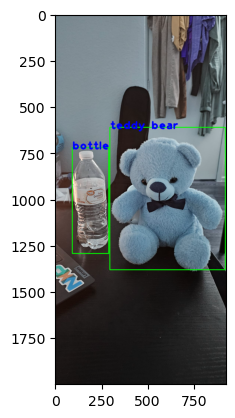

In [15]:
plt.imshow(img)
plt.show()